In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

# Regresión Lineal
-------

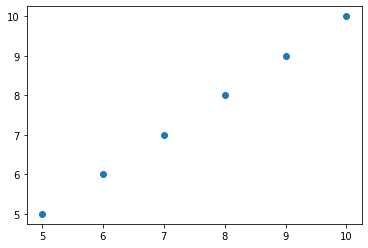

In [ ]:
car_prices = [5,6,7,8,9,10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]
plt.scatter(car_prices, car_prices)

In [ ]:
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(units_sold).reshape(-1, 1)

In [ ]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True) # requires_grad_ Agrega los gradientes
units = torch.from_numpy(units_array).float()

In [ ]:
prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

tensor(0.0164, grad_fn=<MseLossBackward>)


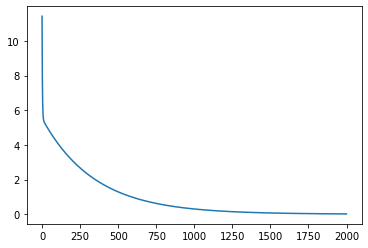

In [ ]:
model = nn.Linear(1,1)
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.015)

losses = []
iterations = 2000
for i in range(iterations):
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
print(loss)
plt.plot(range(iterations), losses)

In [ ]:
x = torch.Tensor([[4.0]])
p = model(x)
p

tensor([[8.7167]], grad_fn=<AddmmBackward>)

# Regresion Logistica
----------

In [59]:
n = 100
h = n//2
dimen = 2
data = np.random.rand(n ,dimen)*3


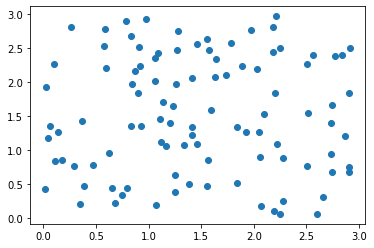

In [60]:
plt.scatter(data[:,0],data[:,1])

In [61]:
data[:h, :] = data[:h, :] - 3*np.ones((h,dimen))

In [62]:
data[h:, :] = data[h:, :] + 3*np.ones((h,dimen))

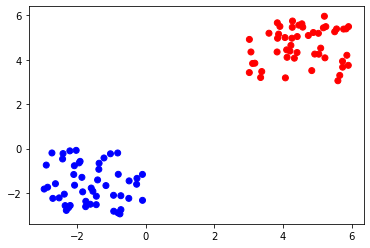

In [63]:
colors = ["blue","red"]
color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0],data[:,1], c=color)


In [64]:
target = np.array([0]*h + [1]*h).reshape(n,1)
x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()
x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

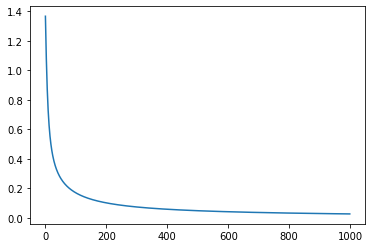

In [69]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []

iterations = 1000

for i in range(iterations):
  result = model(x)
  loss = loss_function(result, y)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(range(iterations), losses)
